In [1]:
import torch
from torch.nn import Linear
import torch.nn as nn

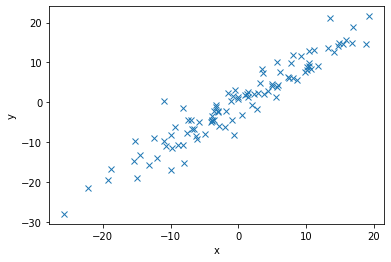

In [7]:
x = torch.randn(100,1)*10
y = x + torch.randn(100,1)*3
import matplotlib.pyplot as plt
plt.plot(x ,y, 'x')
plt.ylabel('y')
plt.xlabel('x');

In [73]:
class LR(nn.Module):
  def __init__(self,in_feature, out_feature):
    super().__init__()
    self.linear = nn.Linear(in_feature,out_feature)
  def forward(self,x):
    return self.linear(x)

In [80]:
torch.manual_seed(1)
model = LR(1, 1)

In [81]:
model

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [82]:
[w,b] = model.parameters()

In [83]:
print(w)
print(b)

Parameter containing:
tensor([[0.5153]], requires_grad=True)
Parameter containing:
tensor([-0.4414], requires_grad=True)


In [91]:
w.item(), b.item()

(0.5152631998062134, -0.44137823581695557)

In [94]:
def get_params():
    return (w.item(), b.item())

In [95]:
get_params()

(0.5152631998062134, -0.44137823581695557)

In [96]:
import numpy as np

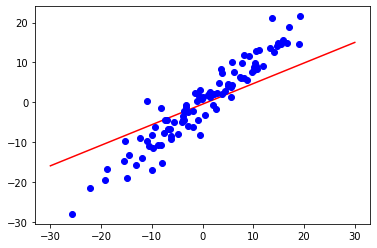

In [97]:
def plot_fit():
    

    w1, b1 = get_params()
    x1 = np.array([-30,30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.plot(x, y, 'bo')
    
plot_fit()

In [98]:
x[:10]

tensor([[  0.5388],
        [ 13.6262],
        [  1.0429],
        [ -8.1856],
        [  2.7310],
        [ 19.2827],
        [ 11.8422],
        [-13.1284],
        [ -6.7582],
        [ -6.4922]])

In [99]:
ypred = model.forward(x)
ypred[:10]


tensor([[-0.1638],
        [ 6.5797],
        [ 0.0960],
        [-4.6591],
        [ 0.9658],
        [ 9.4943],
        [ 5.6605],
        [-7.2060],
        [-3.9237],
        [-3.7866]], grad_fn=<SliceBackward>)

In [100]:
y[:10]

tensor([[ -3.0932],
        [ 21.1527],
        [  1.9592],
        [ -1.4399],
        [ -1.7732],
        [ 21.5791],
        [  9.2196],
        [-15.6274],
        [ -6.7886],
        [ -6.6873]])

In [101]:
criterion(ypred, y)

tensor(29.3806, grad_fn=<MseLossBackward>)

In [54]:
losses

[tensor(29.3806, grad_fn=<MseLossBackward>),
 tensor(24.5130, grad_fn=<MseLossBackward>),
 tensor(20.7941, grad_fn=<MseLossBackward>),
 tensor(17.9526, grad_fn=<MseLossBackward>),
 tensor(15.7813, grad_fn=<MseLossBackward>),
 tensor(14.1220, grad_fn=<MseLossBackward>),
 tensor(12.8536, grad_fn=<MseLossBackward>),
 tensor(11.8840, grad_fn=<MseLossBackward>),
 tensor(11.1425, grad_fn=<MseLossBackward>),
 tensor(10.5754, grad_fn=<MseLossBackward>),
 tensor(10.1414, grad_fn=<MseLossBackward>),
 tensor(9.8091, grad_fn=<MseLossBackward>),
 tensor(9.5546, grad_fn=<MseLossBackward>),
 tensor(9.3595, grad_fn=<MseLossBackward>),
 tensor(9.2098, grad_fn=<MseLossBackward>),
 tensor(9.0948, grad_fn=<MseLossBackward>),
 tensor(9.0063, grad_fn=<MseLossBackward>),
 tensor(8.9381, grad_fn=<MseLossBackward>),
 tensor(8.8855, grad_fn=<MseLossBackward>),
 tensor(8.8447, grad_fn=<MseLossBackward>),
 tensor(8.8130, grad_fn=<MseLossBackward>),
 tensor(8.7882, grad_fn=<MseLossBackward>),
 tensor(8.7689, grad_

In [44]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [45]:
epochs = 100
losses = []
for i in range(epochs + 1):
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    print('epoch is {} and the loss is {}'.format(i,loss.item()))
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch is 0 and the loss is 29.380569458007812
epoch is 1 and the loss is 24.512958526611328
epoch is 2 and the loss is 20.7940731048584
epoch is 3 and the loss is 17.95260238647461
epoch is 4 and the loss is 15.781328201293945
epoch is 5 and the loss is 14.121973037719727
epoch is 6 and the loss is 12.85364055633545
epoch is 7 and the loss is 11.88399887084961
epoch is 8 and the loss is 11.142533302307129
epoch is 9 and the loss is 10.57537841796875
epoch is 10 and the loss is 10.141386032104492
epoch is 11 and the loss is 9.809136390686035
epoch is 12 and the loss is 9.554621696472168
epoch is 13 and the loss is 9.359511375427246
epoch is 14 and the loss is 9.209800720214844
epoch is 15 and the loss is 9.0947904586792
epoch is 16 and the loss is 9.00631332397461
epoch is 17 and the loss is 8.938124656677246
epoch is 18 and the loss is 8.885456085205078
epoch is 19 and the loss is 8.844666481018066
epoch is 20 and the loss is 8.812969207763672
epoch is 21 and the loss is 8.788240432739

Text(0, 0.5, 'losses')

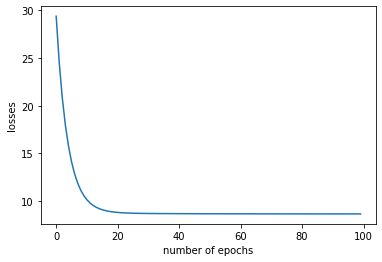

In [55]:
plt.plot(range(epochs),losses)
plt.xlabel('number of epochs')
plt.ylabel('losses')

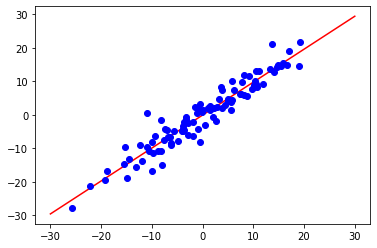

In [57]:
plot_fit()

In [58]:
w

Parameter containing:
tensor([[0.9837]], requires_grad=True)

In [59]:
b

Parameter containing:
tensor([-0.1119], requires_grad=True)